# Weight matrix analysis for $L=36$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy import stats
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(12)

import sys
sys.path.append('/modules')
from modules.mc_ising2d import IsingMC
from modules.net import Net
from rbm import RBM

Tc_Ons = 2 / ( np.log(1 + np.sqrt(2)) )
Tc_MF = 4.0
L = 36

Loading the RBM model.

In [3]:
rbm_L036_all = RBM()
rbm_L036_all = torch.load('RBM_trained_models/RBM_model_T_complete_nv1296_nh1296_lr1.0E-03_k1_bsize100_nepochs5000.pt',
                 map_location=torch.device('cpu'))

W_L036_all, v, h = rbm_L036_all.parameters()
del v
del h

## Complete

### Analysis of $ {\cal W}$

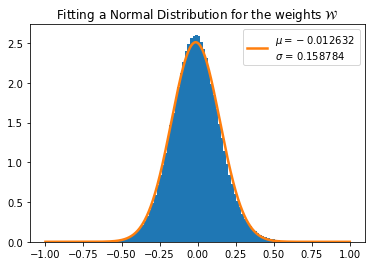

In [5]:
W_ = W_L036_all.numpy().reshape((W_L036_all.shape[0]*W_L036_all.shape[1]))

# Plot normalized histogram 
plt.hist(W_, bins= 100, density= True)

# Maximum and minimum of xticks to compute the theoretical distribution 
x_min, x_max = min(plt.xticks()[0]), max(plt.xticks()[0])  
domain = np.linspace(x_min, x_max, len(W_))

# Fitting a normal distribution
muW_, sigmaW_ = stats.norm.fit(W_) 

plot_pdf = stats.norm.pdf(domain, muW_, sigmaW_) # Fitting the PDF in the interval


plt.plot(domain, plot_pdf, linewidth= 2.5,
         label= '$\mu= %f$ \n$\sigma$ = %f' % (muW_, sigmaW_ ))

plt.title('Fitting a Normal Distribution for the weights ${\cal W}$')
plt.legend()
plt.show()

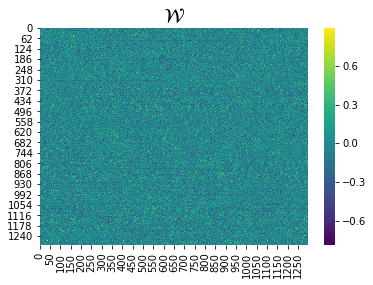

In [6]:
plt.title('${\cal W} $', fontsize= 20)
sns.heatmap(W_L036_all, linewidths= 0.0, cmap= 'viridis')
plt.show()

#### SVD of ${\cal W} $

In [7]:
u_L036_all, s_L036_all, v_L036_all = torch.svd(W_L036_all)

[]

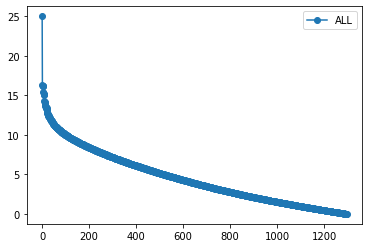

In [8]:
plt.plot(s_L036_all.numpy(), label= 'ALL', marker= 'o')
plt.legend()
plt.plot()

#### Sampling Ising states using the left singular vectors $u$

mag =  0.03086


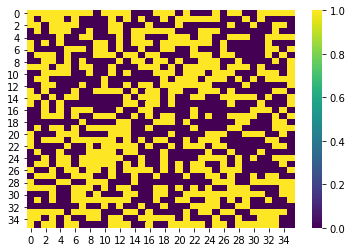

mag =  0.00926


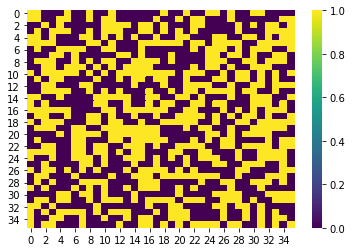

mag =  0.02469


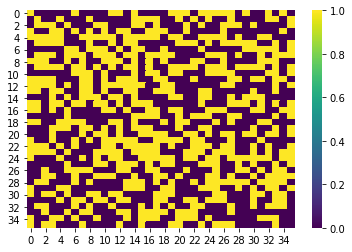

mag =  0.02932


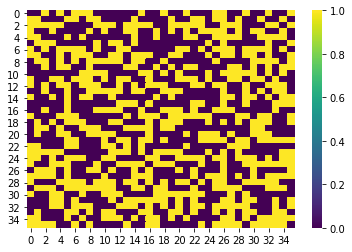

mag =  0.00772


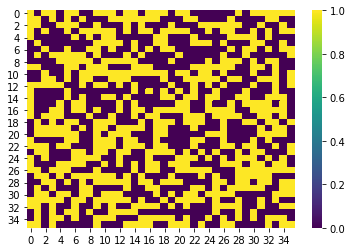

mag =  0.01698


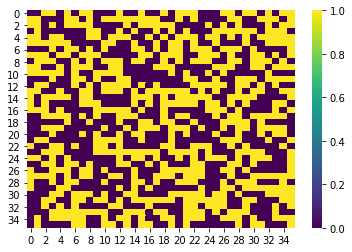

mag =  0.02623


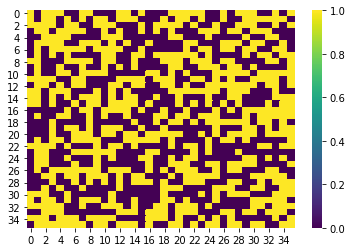

mag =  0.06481


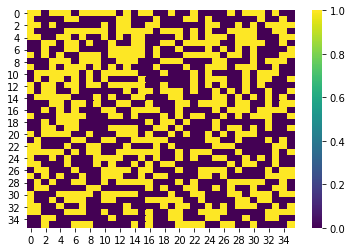

mag =  0.00463


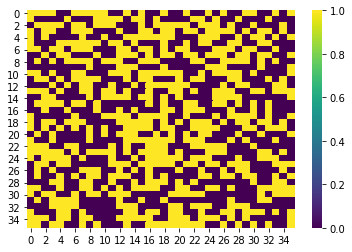

mag =  0.03086


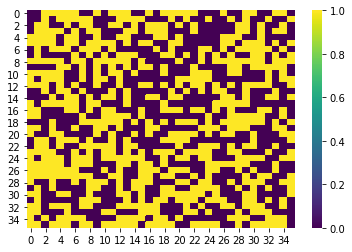

In [10]:
for j in range(10):
    p = torch.sigmoid(u_L036_all[j])
    rand_prob = torch.rand(p.size())
    state = F.relu( torch.sign( p - rand_prob ) ).reshape((L,L))
    mag = (2*state - 1 ).mean().abs().item()
    print('mag =  %.5f' % mag)
    sns.heatmap(state, linewidths= 0.0, cmap= 'viridis')
    plt.show()

#### Sampling Ising states using the right singular vectors $v$

mag =  0.06636


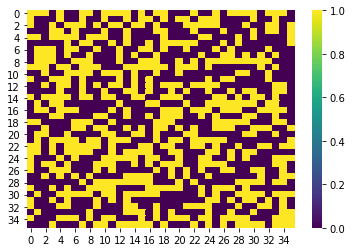

mag =  0.01235


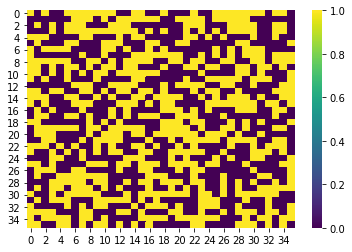

mag =  0.02469


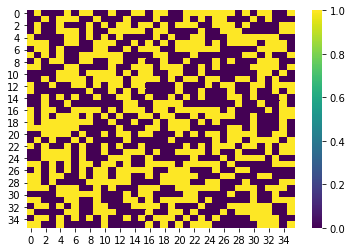

mag =  0.04167


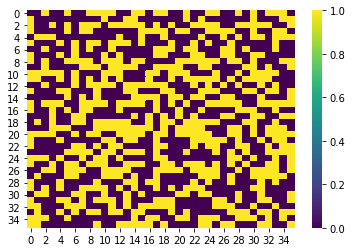

mag =  0.00772


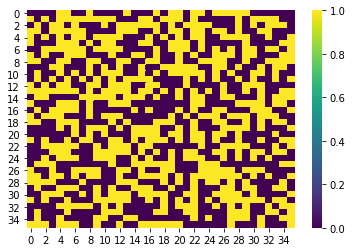

mag =  0.02623


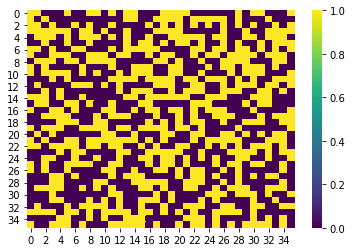

mag =  0.00154


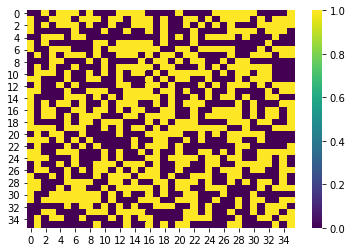

mag =  0.02469


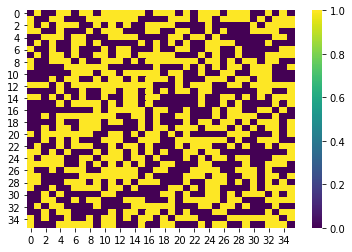

mag =  0.03858


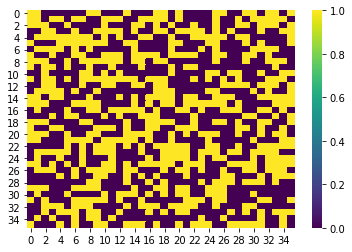

mag =  0.04938


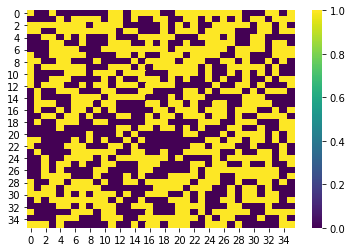

In [11]:
for j in range(10):
    p = torch.sigmoid(v_L036_all[j])
    rand_prob = torch.rand(p.size())
    state = F.relu( torch.sign( p - rand_prob ) ).reshape((L,L))
    mag = (2*state - 1 ).mean().abs().item()
    print('mag =  %.5f' % mag)
    sns.heatmap(state, linewidths= 0.0, cmap= 'viridis')
    plt.show()

#### Eigenvalues of ${\cal W} $

There are imaginary eigenvalues.

In [12]:
eigen_val_vec_all_W = torch.eig(W_L036_all, eigenvectors= True)

In [13]:
eigen_all_W = eigen_val_vec_all_W[0]
eigen_all_W

tensor([[-16.3966,   0.0000],
        [  1.8891,   5.3625],
        [  1.8891,  -5.3625],
        ...,
        [ -0.1424,  -0.0653],
        [  0.1129,   0.0000],
        [ -0.0818,   0.0000]])

### Analysis of $ {\cal W} {\cal W}^{T}$

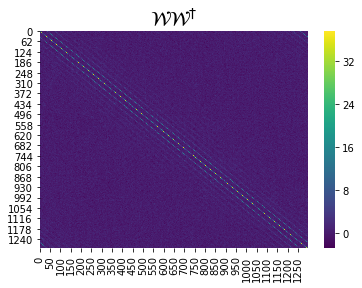

In [15]:
WW = torch.mm(W_L036_all.t(), W_L036_all)
sns.heatmap(WW, linewidths= 0.0, cmap= 'viridis')
plt.title('${\cal W} {\cal W}^{\dag}$', fontsize= 20)
plt.show()

#### Eigenvalues of ${\cal W} {\cal W}^T $

In [16]:
eigen_val_vec = torch.eig(W_L036_all*W_L036_all.t(), eigenvectors= True)

In [17]:
eigen_ALL = eigen_val_vec[0][:,0]

In [19]:
x = np.flip(np.arange(L*L))

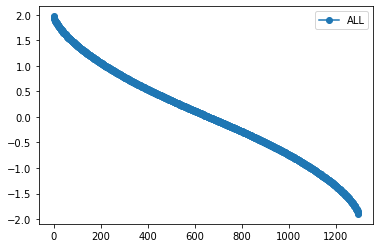

In [20]:
plt.plot(x, np.sort(eigen_ALL.numpy()), label= 'ALL', marker= 'o')
plt.legend()
plt.show()

In [21]:
eigen_val_vec[1][0]

tensor([ 0.0298,  0.0105, -0.0077,  ...,  0.0038,  0.0198,  0.0042])

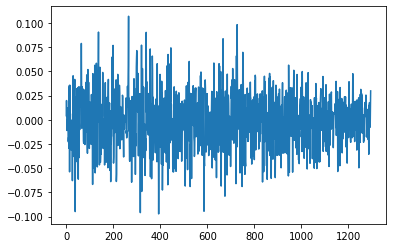

In [22]:
plt.plot(np.flip(np.arange(L*L)), eigen_val_vec[1][0].numpy()  )

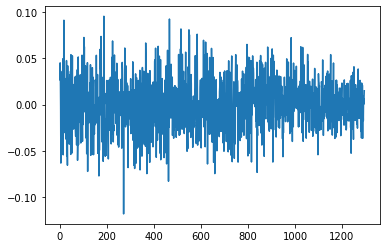

In [23]:
plt.plot(np.flip(np.arange(L*L)), eigen_val_vec[1][-1].numpy()  )